In [103]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, ttest_rel

# Example 1: Gas Consumption

* In the 1980s data from 15 houses was gathered
* Temperature difference (inside – outside), in degrees Celsius
* Daily gas consumption, in kWh

* How are these quantities related?

In [94]:
data = pd.read_table("files/temp_gas.csv")
data

,temp_diff,power
0,10.3,69.81
1,11.4,82.75
2,11.5,81.75
3,12.5,80.38
4,13.1,85.89
5,13.4,75.32
6,13.6,69.81
7,15.0,78.54
8,15.2,81.29
9,15.3,99.20


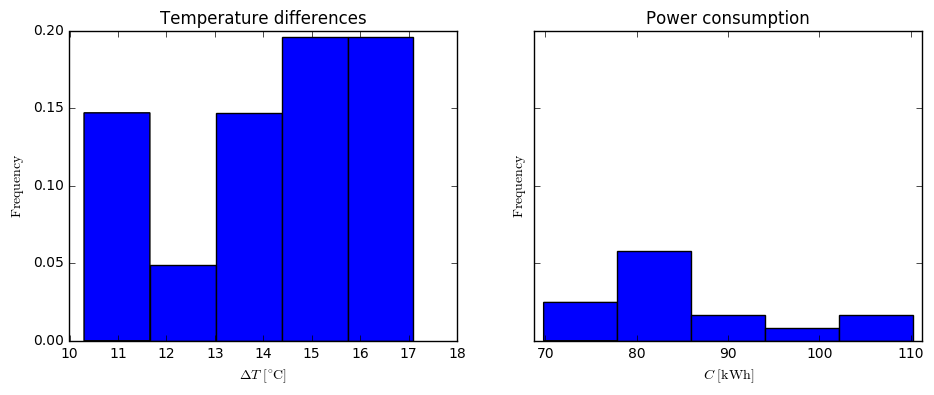

In [134]:
matplotlib.rcParams["text.usetex"] = False

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (11, 4))

ax1.hist(data.temp_diff, bins = 5, normed = 1)
ax1.set_xlabel(r"$\Delta T\ [^{\circ} \mathrm{C}]$")
ax1.set_ylabel(r"$\mathrm{Frequency}$")
ax1.set_title('Temperature differences')

ax2.hist(data.power, bins = 5, normed = 1)
ax2.set_xlabel(r"$C\ [\mathrm{kWh}]$")
ax2.set_ylabel(r"$\mathrm{Frequency}$")
ax2.set_title('Power consumption')
ax2.set_xlim([min(data.power)-1, max(data.power)+1])
plt.show()

Above histograms indicate no outliers on the graphics.

## Checking for a Correlation
We will draw a scatter plot to find if any correlation exists between the "temperature difference" and "power consumption".

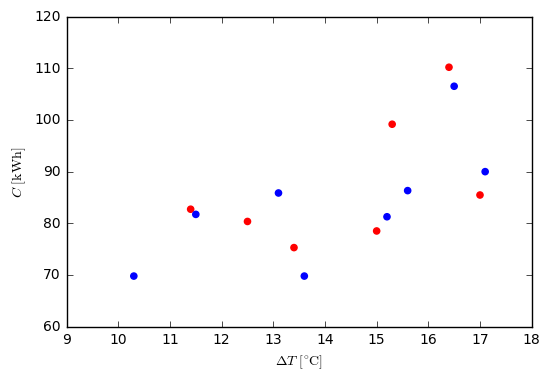

In [138]:
plt.scatter(data.temp_diff, data.power, color="br")
plt.xlabel(r"$\Delta T\ [^{\circ}\mathrm{C}]$")
plt.ylabel(r"$C\ [\mathrm{kWh}]$")
plt.show()

It is visible the positive correlation between the variables. To check the linear dependence and the strength between variables will be used ** Pearson correlation coefficient **.

In [142]:
pearson = np.corrcoef(data.temp_diff, data.power)[1][0]
print("Pearson correlation coefficient: ",round(pearson, 4))

Pearson correlation coefficient:  0.6268


# Example 2. Cloud Seeding

We have observing two different clouds in the data set. One is randomly seeded with silver nitrate. "Seeds" make droplets fall faster which causes small raindrops. We have also unseeded clouds.
* Plot the data
* Is there any pattern
* Transformation
Does seeding increase rainfall? Is the rainfall significantly larger?

In [3]:
clouds_data = pd.read_csv("files/clouds.csv", sep="\t")
clouds_data

,Unseeded,Seeded
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4
5,244.3,489.1
6,163.0,430.0
7,147.8,334.1
8,95.0,302.8
9,87.0,274.7


The values seems to be ok.

We will draw histograms to see how this values are distributed.

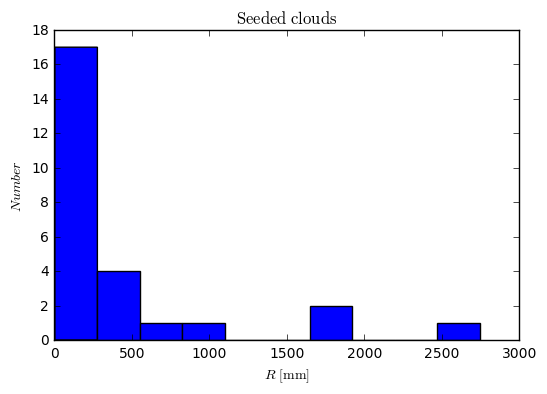

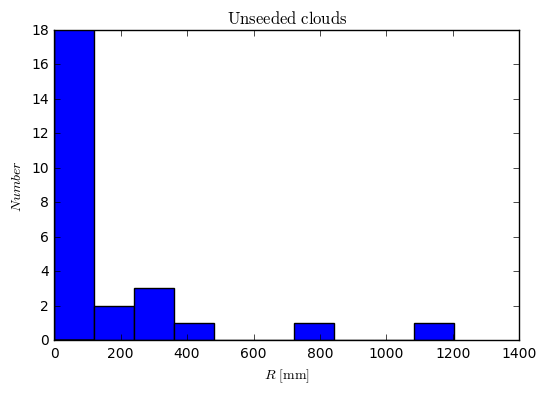

In [10]:
def plot_histogram (data, xlabel, ylabel, title, bin=20):
    plt.hist(data, bins = 10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_histogram(clouds_data["Seeded"], r"$R\ [\mathrm{mm}]$", "$Number$", "$\mathrm{Seeded\ clouds}$")
plot_histogram(clouds_data["Unseeded"], r"$R\ [\mathrm{mm}]$", "$Number$", "$\mathrm{Unseeded\ clouds}$")

Look similar but have different range. We will plot them together and compare the difference. Below is used 
a formula for equally distributed bin boundaries: *bins=range(min(data), max(data) + binwidth, binwidth))*

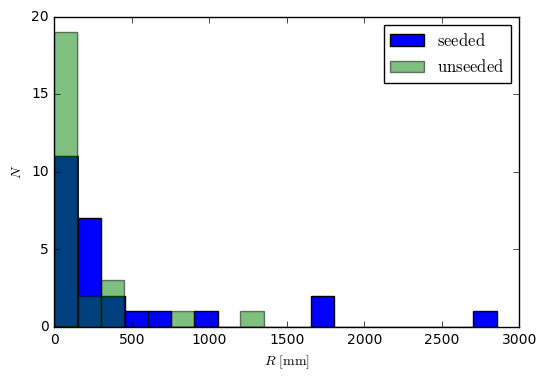

In [47]:
binwidth = 150
unseeded_bins = np.arange(min(clouds_data["Unseeded"]), max(clouds_data["Unseeded"]) + binwidth, binwidth)
seeded_bins = np.arange(min(clouds_data["Seeded"]), max(clouds_data["Seeded"]) + binwidth, binwidth)

plt.hist(clouds_data["Seeded"], bins = seeded_bins, label = "$\mathrm{seeded}$")
plt.hist(clouds_data["Unseeded"], bins = unseeded_bins, alpha = 0.5, label = "$\mathrm{unseeded}$")
plt.xlabel("$R\ [\mathrm{mm}]$")
plt.ylabel("$N$")
plt.legend()
plt.show()

The ranges of the distributions need to be normalized. In order to do this is used logarithmic transformation to better analyze and interpret the data. We will use natural logarithm - logarithm in base e. Below we create two additional columns for the respective log values.

In [50]:
clouds_data['log_seeded'] = np.log(clouds_data["Seeded"])
clouds_data["log_unseeded"]  = np.log(clouds_data["Unseeded"])


clouds_data.head()

,Unseeded,Seeded,log_seeded,log_unseeded
0,1202.6,2745.6,7.917755,7.092241
1,830.1,1697.8,7.437089,6.721546
2,372.4,1656.0,7.412160,5.919969
3,345.5,978.0,6.885510,5.844993
4,321.2,703.4,6.555926,5.772064


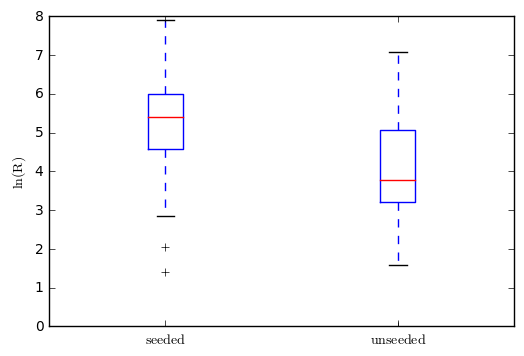

In [65]:
plt.boxplot([clouds_data['log_seeded'], clouds_data["log_unseeded"]])
plt.xticks([1, 2], ["$\mathrm{seeded}$", "$\mathrm{unseeded}$"])
plt.ylabel("$\ln(\mathrm{R})$", fontsize=10)
plt.show()

#plt.set_xlabel(["$\mathrm{unseeded}$", "$\mathrm{seeded}$"])

It can be seen that the seeded clouds lead to more rain.

## Significant results and null hypothesis
We will look for significant difference between both data sets. For this purpose we will examine 
the null hypothesis $H_0$ = "Rainfall from seeded clouds is not larger" and $\alpha = 0.05$. We will 

In this case, a p-value ≤ 0.05 will indicate a strong evidence against the null hypothesis (rejecting the null hypothesis).

In [69]:
p_value = ttest_ind(clouds_data['log_seeded'], clouds_data['log_unseeded']).pvalue

We have two-tailed test including both the positive (greater than) and the negative(less than) parts of the curve.
Both regions are the same and we use one of these parts therefore we have to divide the p-value by 2.

In [90]:
half_part = float(p_value / 2)
print("p-value: {0:.6f}".format(half_part))

p-value: 0.007041


Reject $H_0$: the p-value is less than $\alpha$ => seeded clouds produce significantly more rain.